In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.isnull().sum()/df.shape[0]*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df["Route"].mode()

0    DEL → BOM → COK
dtype: object

In [6]:
df["Total_Stops"].mode()

0    1 stop
dtype: object

In [7]:
df["Route"]=df["Route"].fillna(df["Route"].mode()[0])

In [8]:
df["Total_Stops"]=df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df.describe(include="object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2377,233,423,550,5626,8345


# From df.info() we can see that Date_of_Journey is a object data type

In [12]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
# df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
# df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [14]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [15]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [16]:
df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [17]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 918.2+ KB


In [19]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [20]:
len(df["Airline"].unique())

12

In [21]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# 1st Insight: How many Flight With Respect to their Stopage?

In [22]:
sns.set(style="darkgrid")

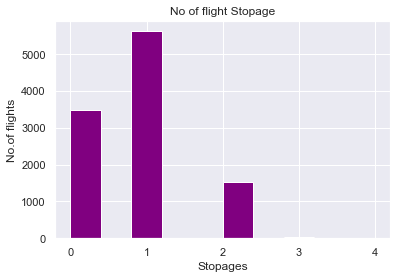

In [23]:
plt.title("No of flight Stopage")
plt.hist(df["Total_Stops"],color="purple")
plt.xlabel("Stopages")
plt.ylabel("No.of flights")
plt.xticks(df["Total_Stops"].unique())
plt.show()

In [24]:
df["Total_Stops"].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
dateplt.bar(df["Airline"],df["Total_Stops"],color="Purple")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df["Total_Stops"]==4]

In [ ]:
df.loc[df["Total_Stops"]==4].count()

# 2nd Insight:what flight is expensive and cheap

In [ ]:
plt.boxplot(df["Price"])
plt.xticks(rotation=90,size=11)
plt.title("Flight Price")
plt.show()

In [ ]:
# 3nd Insight:

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df["Source"],df["Price"],data=df)
plt.xticks(rotation=90,size=15)
plt.title("varition of prices by source")
plt.show()

In [ ]:
df

In [ ]:
df["Date_of_Journey"].unique()

In [ ]:
df["Day_of_Journey"]=df["Date_of_Journey"].dt.day

In [ ]:
df["Day_of_Journey"].unique()

In [ ]:
df["Month_of_Journey"]=df["Date_of_Journey"].dt.month

In [ ]:
df["Month_of_Journey"].unique()

In [ ]:
df

In [ ]:
plt.figure(figsize=(8,8))
month=list(df["Month_of_Journey"])
airline=list(df["Airline"])
plt.scatter(airline,month)
plt.xticks(rotation=90)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("months have maximum Flight Take off")
plt.xlabel("Airlines")
plt.ylabel("Months")
plt.show()

In [ ]:
df[df["Month_of_Journey"]==10]

In [ ]:
df.groupby(["Month_of_Journey"])["Price"].sum()

In [ ]:
z=df.groupby(["Month_of_Journey"])["Price"].agg(["sum"]).iloc[:,0]
z=list(z)
z

In [ ]:
Y=list(df["Month_of_Journey"].unique())

In [ ]:
plt.bar(Y,z);

In [ ]:
df["Destination"].unique()

In [ ]:
df[df["Destination"]=="Delhi"]

In [ ]:
df.replace({"Delhi":"New Delhi"},inplace=True)

In [ ]:
df["Destination"].unique()

In [ ]:
df1=df.groupby(["Source","Destination"])["Airline"].value_counts().reset_index

In [ ]:
df1